In [1]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 2.9MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=2797d569e141864672a6784a272d8b89c846852a63165c9a77409f10768aeb07
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import japanize_matplotlib

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/__init__.py:13: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [0]:
sample_size = 100
dim = 2

data = np.random.rand(sample_size, dim)

In [4]:
data.shape

(100, 2)

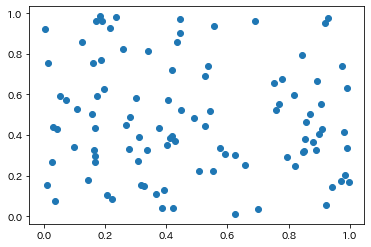

In [5]:
plt.scatter(data[:, 0], data[:, 1])

In [6]:
np.corrcoef(data[:, 0], data[:, 1])

array([[ 1.        , -0.09214479],
       [-0.09214479,  1.        ]])

In [0]:
corr = np.corrcoef(data[:, 0], data[:, 1])

In [0]:
def t(corr, sample_size):
    return corr*np.sqrt(sample_size-2) / np.sqrt(1 - corr**2)

In [9]:
t(corr[1, 0], sample_size)

-0.9160842629568224

## 無相関

In [0]:
N_REPEAT = 10000
sample_sizes = list(map(int, (3, 5, 10, 20, 30, 50, 70, 100, 150, 200, 500, 2000)))

In [11]:
sample_sizes

[3, 5, 10, 20, 30, 50, 70, 100, 150, 200, 500, 2000]

In [0]:
SL = 0.05  # 優位水準

0.9519


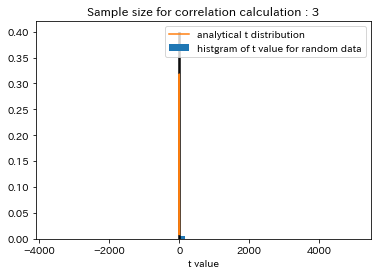

0.9493


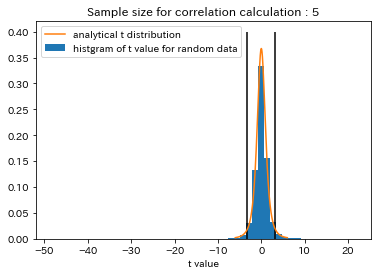

0.9512


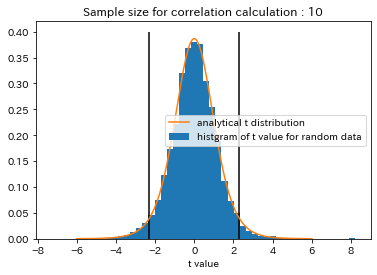

0.9502


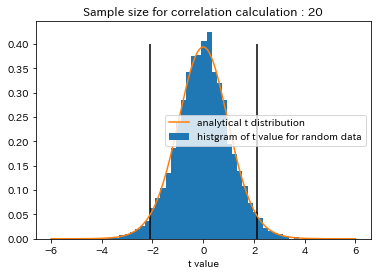

0.9463


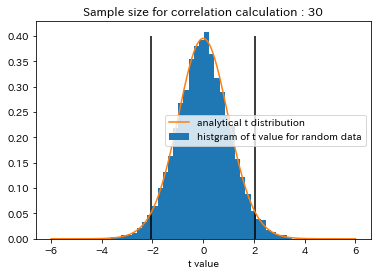

0.9506


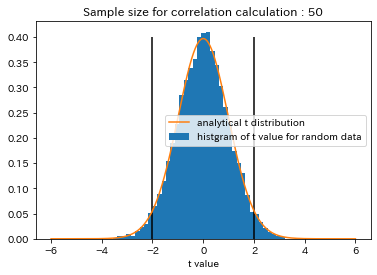

0.9484


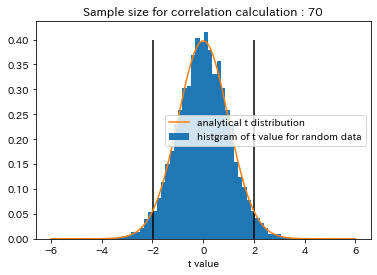

0.9501


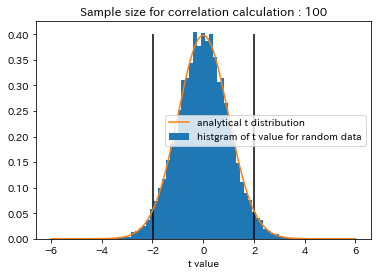

0.9512


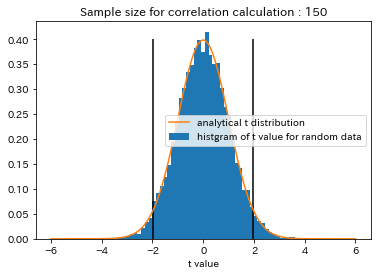

0.9486


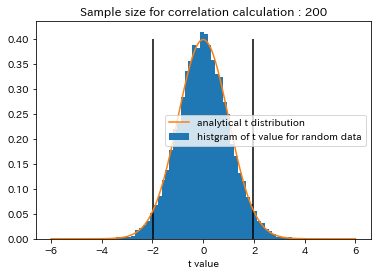

0.9475


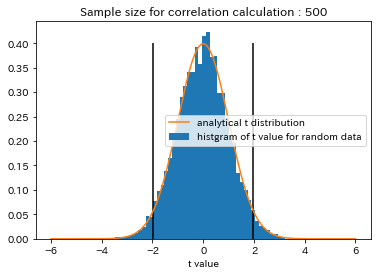

0.951


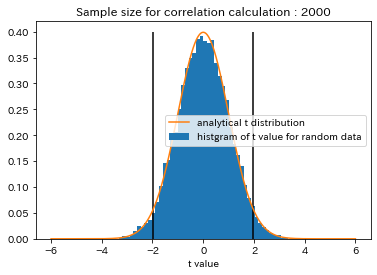

In [14]:
uncorrelated_rates = []

for sample_size in sample_sizes:
    t_vals = []
    for i in range(N_REPEAT):
        data = np.random.rand(sample_size, dim)

        corr = np.corrcoef(data[:, 0], data[:, 1])

        t_val = t(corr[1, 0], sample_size)

        t_vals.append(t_val)

    plt.hist(t_vals, bins=50, density=True, label='histgram of t value for random data')

    x = np.linspace(-6, 6, 1000)
    plt.plot(x, stats.t.pdf(x, sample_size-2), label='analytical t distribution')

    plt.xlabel('t value')
    plt.legend()
    plt.title(f'Sample size for correlation calculation : {sample_size}')

    p_val = stats.t.ppf(1-SL/2, sample_size-2)
    uncorrelated_cnt = ((t_vals >= -p_val) & (t_vals <= p_val)).sum()
    uncorrelated_rate = uncorrelated_cnt / len(t_vals)
    print(uncorrelated_rate)
    uncorrelated_rates.append(uncorrelated_rate)

    plt.vlines([-p_val, p_val], 0, 0.4)

    plt.show()

In [15]:
uncorrelated_rates

[0.9519,
 0.9493,
 0.9512,
 0.9502,
 0.9463,
 0.9506,
 0.9484,
 0.9501,
 0.9512,
 0.9486,
 0.9475,
 0.951]

(0.0, 1.0)

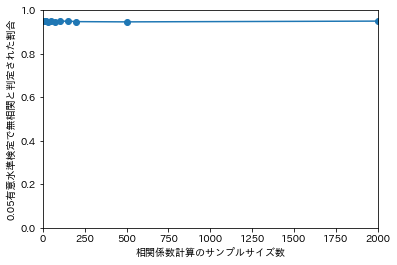

In [17]:
plt.plot(sample_sizes, uncorrelated_rates, marker='o')
plt.xlabel('相関係数計算のサンプルサイズ数')
plt.ylabel(f'{SL}有意水準検定で無相関と判定された割合')
plt.xlim(0, 2000)
plt.ylim(0, 1)

## 相関あり

In [0]:
x = np.random.rand(100, 1)[:, 0]
y =  0.4*x + 0.6*np.random.rand(100, 1)[:, 0]

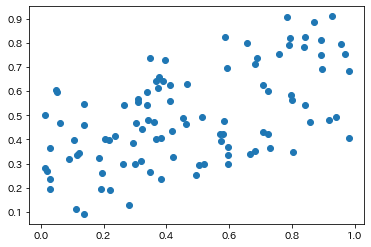

In [19]:
plt.scatter(x, y)

In [0]:
N_REPEAT = 10000
sample_sizes = list(map(int, (3, 5, 10, 20, 30, 50, 70, 100, 150, 200, 500)))

In [0]:
SL = 0.05  # 優位水準

0.9372


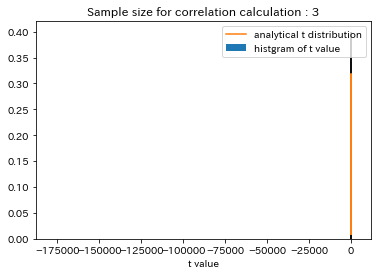

0.8632


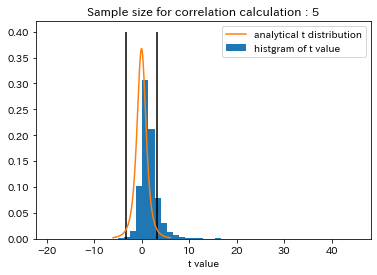

0.6129


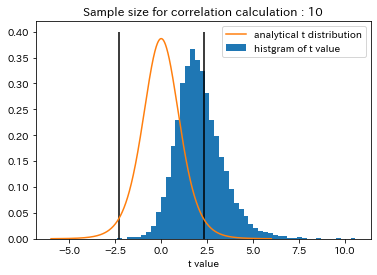

0.2347


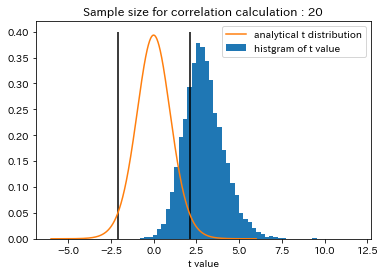

0.073


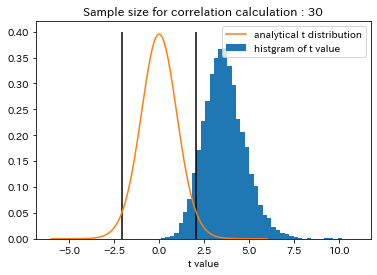

0.0042


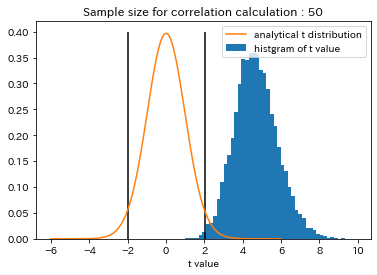

0.0003


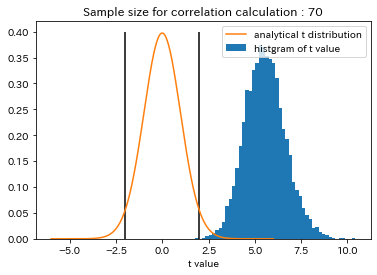

0.0


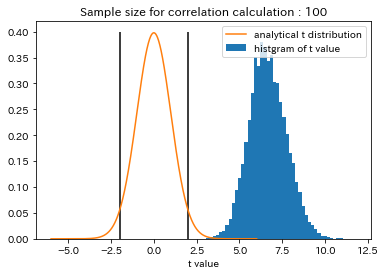

0.0


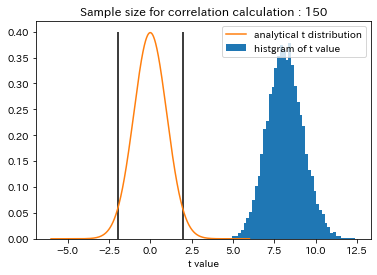

0.0


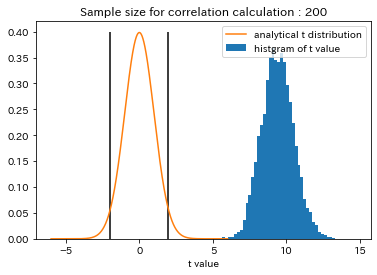

0.0


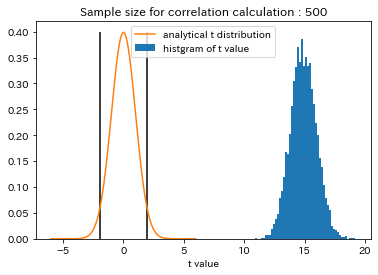

In [22]:
uncorrelated_rates = []

for sample_size in sample_sizes:
    t_vals = []
    for i in range(N_REPEAT):
        x = np.random.rand(sample_size, 1)[:, 0]
        y =  0.4*x + 0.6*np.random.rand(sample_size, 1)[:, 0]

        corr = np.corrcoef(x, y)

        t_val = t(corr[1, 0], sample_size)

        t_vals.append(t_val)

    t_vals = np.array(t_vals)

    plt.hist(t_vals, bins=50, density=True, label='histgram of t value')
    
    x = np.linspace(-6, 6, 1000)
    plt.plot(x, stats.t.pdf(x, sample_size-2), label='analytical t distribution')

    plt.xlabel('t value')
    plt.legend()
    plt.title(f'Sample size for correlation calculation : {sample_size}')

    p_val = stats.t.ppf(1-SL/2, sample_size-2)
    uncorrelated_cnt = ((t_vals >= -p_val) & (t_vals <= p_val)).sum()
    uncorrelated_rate = uncorrelated_cnt / len(t_vals)
    print(uncorrelated_rate)
    uncorrelated_rates.append(uncorrelated_rate)

    plt.vlines([-p_val, p_val], 0, 0.4)

    plt.show()

(0.0, 210.0)

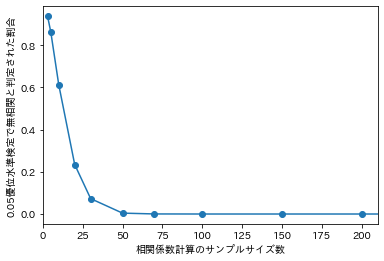

In [24]:
plt.plot(sample_sizes, uncorrelated_rates, marker='o')
plt.xlabel('相関係数計算のサンプルサイズ数')
plt.ylabel(f'{SL}優位水準検定で無相関と判定された割合')
plt.xlim(0, 210)